In [20]:
import sys
import logging
import os
import json

import numpy as np

import librosa
from librosa.feature import mfcc
import scdata

sys.path.append('..')
logging.getLogger().setLevel(logging.INFO)

from aural_travels.data import soundcloud

In [3]:
# Adjust this to your local copy of the SoundCloud dataset.
# Should contain the `scdata.json` file and the `audio` directory.
DATA_DIR = '/home/leo/src/scdata'
AUDIO_DIR = os.path.join(DATA_DIR, 'audio')

In [4]:
with open(os.path.join(DATA_DIR, 'scdata.json')) as f:
    tracks = list(json.load(f).values())

Hip-hop & Rap
182047


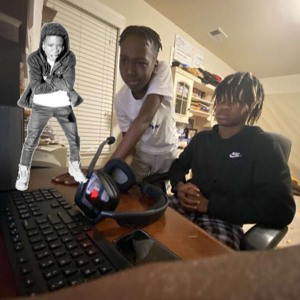

In [5]:
track_idx = 1
print(tracks[track_idx]['genre'])
print(tracks[track_idx]['duration'])

soundcloud.load_image(DATA_DIR, tracks[track_idx]['id'])

In [6]:
x = librosa.load(scdata.get_audio_path(AUDIO_DIR, tracks[track_idx]['id']))

/home/leo/miniconda3/envs/aural-travels/lib/python3.9/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [7]:
x[0].shape

(4013453,)

In [8]:
x[1]

22050

In [9]:
x[0].shape[0] / x[1]

182.01600907029479

In [16]:
m = mfcc(x[0], sr=x[1])

In [17]:
m.shape

(20, 7839)

In [21]:
np.mean(m, axis=1)

array([-191.0352    ,   88.60984   ,    9.373584  ,   33.091045  ,
          8.046666  ,   16.82894   ,    4.5176234 ,   11.819114  ,
         -0.85210145,    6.58905   ,    2.7700899 ,    4.143615  ,
          2.989914  ,    8.693743  ,    7.078399  ,   10.967877  ,
          5.345294  ,    5.689876  ,   -4.3189273 ,   -0.25401792],
      dtype=float32)

In [22]:
np.std(m, axis=1)

array([116.04014 ,  37.65    ,  32.61138 ,  29.577717,  21.21303 ,
        19.472189,  15.849515,  15.195958,  14.670901,  14.831462,
        13.962219,  11.201545,  11.304793,  10.408071,  10.117194,
         9.261749,   8.934337,   9.81435 ,  10.834932,  11.088102],
      dtype=float32)